In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Installing Kaggle library in order to download Kaggle dataset-
pip install kaggle

In [ ]:
#Function to connect to Kaggle api - 
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"siddharthsrivastava5","key":"84a806537f7d3bc63dc8c3fc9a2b4e85"}

import json

# with open('/root/.kaggle/kaggle.json', 'w') as file:
#     json.dump(api_token, file)

# !chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#Authenticate API-
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [ ]:
#Setting up the environmnet to download dataset from Kaggle to google drive-
import os
os.environ['KAGGLE_USERNAME'] = "siddharthsrivastava5" # username from the json file
os.environ['KAGGLE_KEY'] = "84a806537f7d3bc63dc8c3fc9a2b4e85" # key from the json file
!kaggle competitions download -c msk-redefining-cancer-treatment -p/content/drive/MyDrive

training_text.zip: Skipping, found more recently modified local copy (use --force to force download)
stage_2_private_solution.csv.7z: Skipping, found more recently modified local copy (use --force to force download)
stage2_sample_submission.csv.7z: Skipping, found more recently modified local copy (use --force to force download)
training_variants.zip: Skipping, found more recently modified local copy (use --force to force download)
stage1_solution_filtered.csv.7z: Skipping, found more recently modified local copy (use --force to force download)
stage2_test_variants.csv.7z: Skipping, found more recently modified local copy (use --force to force download)
test_text.zip: Skipping, found more recently modified local copy (use --force to force download)
stage2_test_text.csv.7z: Skipping, found more recently modified local copy (use --force to force download)
test_variants.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#Unzipping the 'training_variants' file- 
import zipfile
with zipfile.ZipFile('/content/training_variants.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive')

In [12]:
#Creating a dataframe-
df=pd.read_csv('/content/drive/MyDrive/training_variants')

In [ ]:
df.head()

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [ ]:
df.shape

(3321, 4)

In [ ]:
#Unzipping the 'training text' file- 
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/training_text.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive')

In [13]:
#Creating a dataframe-
df_1=pd.read_csv('/content/drive/MyDrive/training_text',sep='\|\|')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [4]:
df_1.head()

,"ID,Text"
0,Cyclin-dependent kinases (CDKs) regulate a var...
1,Abstract Background Non-small cell lung canc...
2,Abstract Background Non-small cell lung canc...
3,Recent evidence has demonstrated that acquired...
4,Oncogenic mutations in the monomeric Casitas B...


In [ ]:
df_1.shape

(3321, 1)

In [14]:
#Merging both the dataframe ie 'df' and 'df_1' to create one single dataframe-
df_2 = pd.concat([df, df_1], axis=1, join='inner')

In [15]:
#Renaming the column -

df_2=df_2.rename(columns={"ID,Text":"Text"})

In [7]:
df_2.head()

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


In [ ]:
df_2.loc[df_2['Gene']=='ETV6']

,ID,Gene,Variation,Class,Text
981,981,ETV6,R418G,4,Abstract Some familial platelet disorders are...
982,982,ETV6,R369Q,1,We report germline missense mutations in ETV6 ...
983,983,ETV6,Fusions,2,Congenital fibrosarcoma (CFS) and cellular mes...
984,984,ETV6,P214L,4,Abstract Some familial platelet disorders are...
985,985,ETV6,R369W,1,We report germline missense mutations in ETV6 ...
986,986,ETV6,385_418del,4,Abstract Some familial platelet disorders are...
987,987,ETV6,ETV6-FLT3 Fusion,7,The myeloproliferative disorders (MPD) are chr...
988,988,ETV6,ETV6-NTRK3 Fusion,7,"ETV6-NTRK3 (EN), a chimeric tyrosine kinase ge..."


##Text Preprocessing-

In [16]:
#Removing html tags-
import re
def removing_html_tags(df_2,i):
  pattern="(</*[A-Za-z0-9]+)>+"
# s='''<html> \
#  <h1>Article Heading</h1> \
#  <p>First sentence of some important article. And another one. And then the last one</p></html>'''
  y=df_2[i].apply(lambda x: re.sub(pattern,'',str(x)))
  return removing_double_spaces(y)

#Removing double spaces with single spaces
def removing_double_spaces(y):
  pattern='(\s{2})+'
  y1=y.apply(lambda x: re.sub(pattern,' ',str(x)))
  return remove_punctuations(y1)


#Removing punctuations-
import string
string.punctuation
def remove_punctuations(y1):
  d={}
  for i in string.punctuation:
    d[i]=' '
  t2={}
  for i in list(d.keys()):
    t2[ord(i)]=ord(' ')
  y2=y1.apply(lambda x: x.translate(t2))
  return lowercase_words(y2)



def lowercase_words(y2):
  y3=y2.apply(lambda x: x.split(' '))
  y4=y3.apply(lambda x: [i.lower() for i in x])
  return stopword_removal(y4)


#Removing stopwords- 
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
l=stopwords.words('english')
def stopword_removal(y4):
  y5=y4.apply(lambda x: [i for i in x if i not in l])
  y6=y5.apply(lambda x: ' '.join(x))
  return y6
  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
#Calling the functions for text preprocessing- 

temp=removing_html_tags(df_2,'Text')

In [18]:
print(temp)

0       cyclin dependent kinases  cdks  regulate varie...
1        abstract background non small cell lung cance...
2        abstract background non small cell lung cance...
3       recent evidence demonstrated acquired uniparen...
4       oncogenic mutations monomeric casitas b lineag...
                              ...                        
3316    introduction myelodysplastic syndromes  mds  h...
3317    introduction myelodysplastic syndromes  mds  h...
3318    runt related transcription factor 1 gene  runx...
3319    runx1 aml1 gene frequent target chromosomal tr...
3320    frequent mutations associated leukemia recurre...
Name: Text, Length: 3321, dtype: object


In [19]:
df_2['Text']=temp

In [12]:
df_2.head()

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate varie...
1,1,CBL,W802*,2,abstract background non small cell lung cance...
2,2,CBL,Q249E,2,abstract background non small cell lung cance...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


##Train, CV and Test split-

In [20]:
X=df_2[['ID','Gene','Variation','Text']]
Y=df_2['Class']

In [21]:
from sklearn.model_selection import train_test_split
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X,Y,test_size=0.20,random_state=42,stratify=Y)
X_Train,X_CV,Y_Train,Y_CV=train_test_split(X_Train,Y_Train,test_size=0.20,random_state=42,stratify=Y_Train)

In [22]:
print(X_Train.shape)
print(X_CV.shape)
print(X_Test.shape)
print(Y_Train.shape)
print(Y_CV.shape)
print(Y_Test.shape)


(2124, 4)
(532, 4)
(665, 4)
(2124,)
(532,)
(665,)


##Creating random model to identify the performance thresholds-

In [ ]:
import random
from sklearn.metrics import log_loss
y_pred=np.zeros((len(X_Test),9))
for i in range(len(X_Test)):
  random=np.random.rand(1,9)
  y_pred[i]=(y_pred[i]+random)/random.sum(axis=1)
print("Log loss value for test data is:",log_loss(Y_Test,y_pred))




Log loss value for test data is: 2.498303970583


In [ ]:
print(y_pred[0])

[0.1214658  0.06931126 0.08491757 0.15873012 0.15430284 0.05115325
 0.14127594 0.12841883 0.0904244 ]


In [ ]:
#Creating confusion matrix - 
from sklearn.metrics import confusion_matrix
y_predicted=np.argmax(y_pred,axis=1)
CF=confusion_matrix(Y_Test,y_predicted+1)



In [ ]:
print(CF)

[[12 12  8 15 12 19 12  9 15]
 [10 10  9  6 21 12  4  8 11]
 [ 1  2  4  1  2  3  3  1  1]
 [15 13 16 19 12  9 16 21 16]
 [ 5  9  7  4  3  7  3  8  2]
 [ 5  8  7  7  5  9  6  3  5]
 [20 20 20 13 16 38 20 25 19]
 [ 0  2  0  1  0  0  0  0  1]
 [ 0  1  0  2  1  0  1  1  1]]


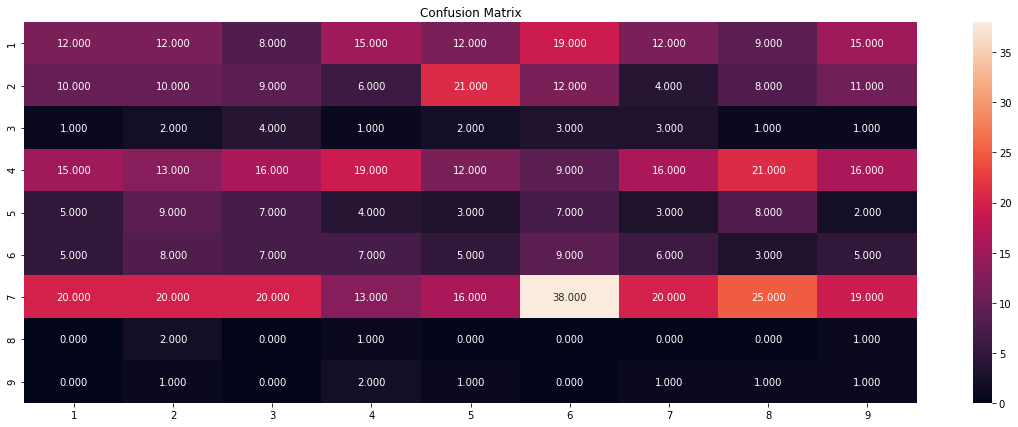

In [ ]:
#Plotting confusion matrix- 
plt.figure(figsize=(20,7))
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix")
labels=[1,2,3,4,5,6,7,8,9]
sns.heatmap(CF,annot=True,fmt=".3f",xticklabels=labels,yticklabels=labels)
plt.show()

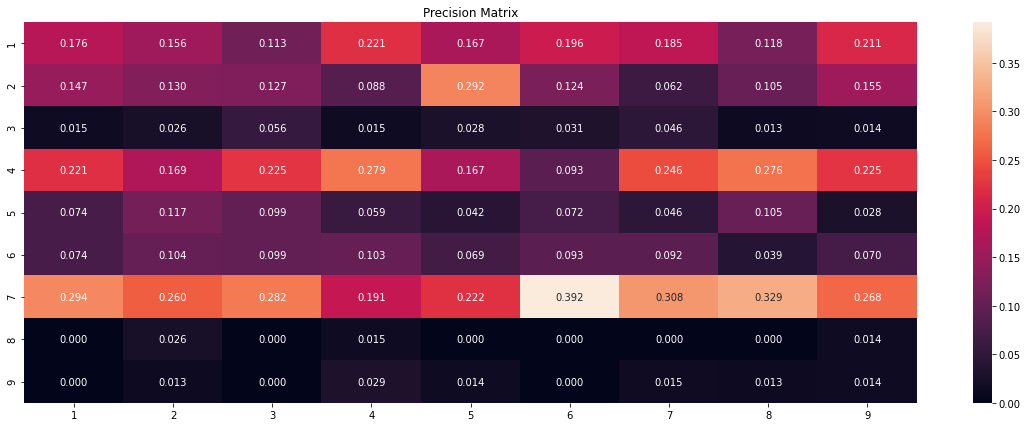

In [ ]:
#Plotting the Precision matrix- 

Precision=CF/CF.sum(axis=0)

plt.figure(figsize=(20,7))
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Precision Matrix")
labels=[1,2,3,4,5,6,7,8,9]
sns.heatmap(Precision,annot=True,fmt=".3f",xticklabels=labels,yticklabels=labels)
plt.show()


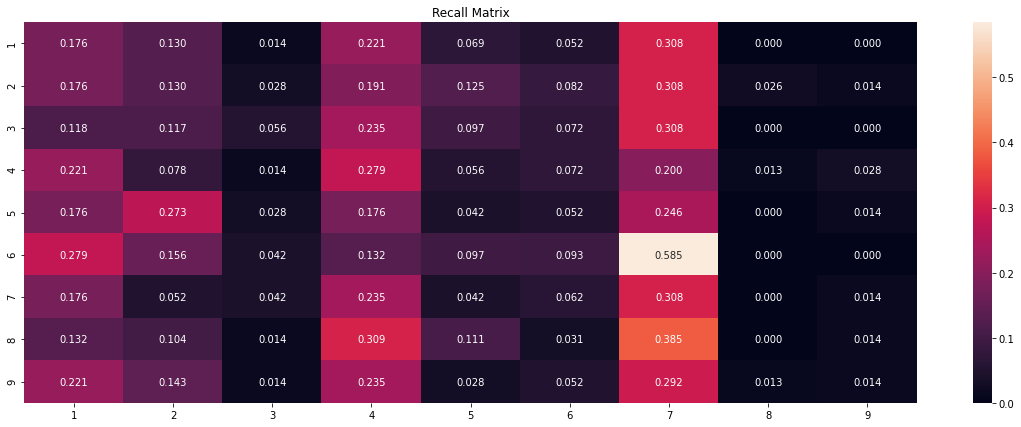

In [ ]:
#Displaying the Recall Matrix-
Recall=(CF.T)/(CF.sum(axis=0)).T
plt.figure(figsize=(20,7))
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Recall Matrix")
labels=[1,2,3,4,5,6,7,8,9]
sns.heatmap(Recall,annot=True,fmt=".3f",xticklabels=labels,yticklabels=labels)
plt.show()


##Univariate analysis-

##Univariate analysis on gene feature-

## What is the data type of gene feature-


In [ ]:
#Data type of gene feature-
cat_features=[i for i in df.columns if df.dtypes[i]=='object' and len(i)<25]


In [ ]:
print("Categorical features are:",cat_features)

Categorical features are: ['Gene', 'Variation']


Conclusion-

Hence Gene is a Categorical feature

##Q2) Wht is the distribution of feature 'Gene'-

In [ ]:
unique_gene=df_2['Gene'].value_counts()

In [ ]:
print(unique_gene)

BRCA1      264
TP53       163
EGFR       141
PTEN       126
BRCA2      125
          ... 
FLT1         1
MDM4         1
INPP4B       1
WHSC1L1      1
PMS1         1
Name: Gene, Length: 264, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


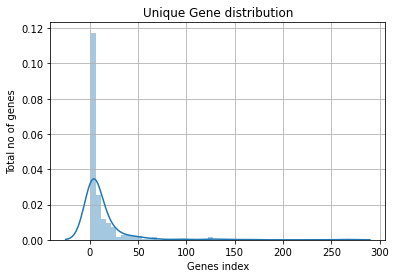

In [ ]:
#Plotting the distribution plot-
sns.distplot(unique_gene.values)
plt.grid()
plt.title("Unique Gene distribution")
plt.xlabel('Genes index')
plt.ylabel('Total no of genes')
plt.show()

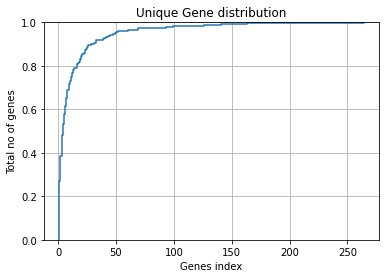

In [ ]:
#Plotting the cdf- 
sns.ecdfplot(unique_gene.values)
plt.grid()
plt.title("Unique Gene distribution")
plt.xlabel('Genes index')
plt.ylabel('Total no of genes')
plt.show()


Conclusion-

It is an skewed distribution where max gene have occured few times but there are some genes very few  that have occured many times and the max no of time a particular gene has occured is 264

##Q3) Is Gene a good feature to predict class type- 

Ans-) This question can be answered by training a base model on gene feature only and trying to predict the class label , and then computing the log loss if log loss value is less than the random model log loss value ie 2.5 then it is a good feature to include as it is helpful in prediciting the class type.

In [23]:
#Converting Categorical feature 'gene' into numerical vector for ML-
#Using response coding in order to convert the categorical feature-
from tqdm import*
def response_coding_gene(X_Train,X_CV,X_Test,Y_Train):
  data={'Gene':X_Train['Gene'],'Labels':Y_Train}
  temp=pd.DataFrame(data=data,columns=['Gene','Labels','Train_Gene','CV_Gene','Test_Gene'])
  response_coding=np.zeros((len(temp['Gene'].unique()),9))
  dict={}
  for i in tqdm(range(len(temp['Gene'].unique().tolist()))):
    for j in range(1,10):
      a=(len(temp.loc[(temp['Gene']==(temp['Gene'].unique().tolist()[i]))& (temp['Labels']==j)])+10)/(len(temp.loc[(temp['Gene']==(temp['Gene'].unique().tolist()[i]))])+90)
      response_coding[i][j-1]=a
    dict[temp['Gene'].unique().tolist()[i]]=response_coding[i]
  for i in range(len(X_Train['Gene'])):
    if (X_Train['Gene'].iloc[i] in list(dict.keys())):
      temp['Train_Gene'].iloc[i]=dict[X_Train['Gene'].iloc[i]]
  for i in range(len(X_CV['Gene'])):
    if (X_CV['Gene'].iloc[i] in list(dict.keys())):
      temp['CV_Gene'].iloc[i]=dict[X_Train['Gene'].iloc[i]]
    else:
      temp['CV_Gene'].iloc[i]=[1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9]

  for i in range(len(X_Test['Gene'])):
    if (X_Test['Gene'].iloc[i] in list(dict.keys())):
      temp['Test_Gene'].iloc[i]=dict[X_Train['Gene'].iloc[i]]
    else:
      temp['Test_Gene'].iloc[i]=[1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9]
  return temp
  

  





In [24]:
S=response_coding_gene(X_Train,X_CV,X_Test,Y_Train)

100%|██████████| 236/236 [00:04<00:00, 53.45it/s]
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [25]:
Gene_response_label_encoding_train=S['Train_Gene'].tolist()
Gene_response_label_encoding_cv=(S['CV_Gene'].loc[S['CV_Gene'].isnull()==False]).tolist()
Generesponse_label_encoding_test=(S['Test_Gene'].loc[S['Test_Gene'].isnull()==False]).tolist()



In [ ]:
#Building a LR model on gene feature using response label encoding -
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss
from tqdm import *
C=[10**i for i in range(-5,1)]
print('When converting categorical feature using reponse label encoding the loss value are as follows-')
for j in C:
  print("For alpha=",j)
  clf=SGDClassifier(alpha=j,loss='log')
  clf.fit(Gene_response_label_encoding_train,Y_Train)
  clf1=CalibratedClassifierCV(clf)
  clf1.fit(Gene_response_label_encoding_train,Y_Train)
  y_pred_train=clf1.predict_proba(Gene_response_label_encoding_train)
  print("Train log loss is:",logloss(Y_Train,y_pred_train))
  y_pred_cv=clf1.predict_proba(Gene_response_label_encoding_cv)
  print("CV log loss is:",logloss(Y_CV,y_pred_cv))
  y_pred_test=clf1.predict_proba(Generesponse_label_encoding_test)
  print("Test log loss is:",logloss(Y_Test,y_pred_test))
  print('*'*50)

def logloss(y_true,y_pred):
  loss=log_loss(y_true,y_pred)
  return loss








When converting categorical feature using reponse label encoding the loss value are as follows-
For alpha= 1e-05
Train log loss is: 1.169643710122634
CV log loss is: 2.756822116527846
Test log loss is: 2.7446866535556977
**************************************************
For alpha= 0.0001
Train log loss is: 1.2013884661857006
CV log loss is: 2.5162275094936515
Test log loss is: 2.5130032933945636
**************************************************
For alpha= 0.001
Train log loss is: 1.2695466302357505
CV log loss is: 2.313795662338354
Test log loss is: 2.32448904413979
**************************************************
For alpha= 0.01
Train log loss is: 1.3056851925621338
CV log loss is: 2.2642541752789023
Test log loss is: 2.2798279251343763
**************************************************
For alpha= 0.1
Train log loss is: 1.3100813569066467
CV log loss is: 2.266769729665338
Test log loss is: 2.286214448659968
**************************************************
For alpha= 1
Train log 

In [26]:
#Performing one hot encoding on categorical feature-
from sklearn.feature_extraction.text import CountVectorizer
clf=CountVectorizer()
clf2=clf.fit(X_Train['Gene'],Y_Train)
gene_one_hot_encoding_train=clf2.transform(X_Train['Gene'])
gene_one_hot_encoding_cv=clf2.transform(X_CV['Gene'])
gene_one_hot_encoding_test=clf2.transform(X_Test['Gene'])



In [ ]:
#Building a LR model on gene feature using one hot encoding -
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss
from tqdm import *
C=[10**i for i in range(-5,1)]
print('When converting categorical feature using one hot  encoding the loss value are as follows-')
for j in C:
  print("For alpha=",j)
  clf=SGDClassifier(alpha=j,loss='log')
  clf.fit(gene_one_hot_encoding_train,Y_Train)
  clf1=CalibratedClassifierCV(clf)
  clf1.fit(gene_one_hot_encoding_train,Y_Train)
  y_pred_train=clf1.predict_proba(gene_one_hot_encoding_train)
  print("Train log loss is:",logloss(Y_Train,y_pred_train))
  y_pred_cv=clf1.predict_proba(gene_one_hot_encoding_cv)
  print("CV log loss is:",logloss(Y_CV,y_pred_cv))
  y_pred_test=clf1.predict_proba(gene_one_hot_encoding_test)
  print("Test log loss is:",logloss(Y_Test,y_pred_test))
  print('*'*50)

def logloss(y_true,y_pred):
  loss=log_loss(y_true,y_pred)
  return loss

When converting categorical feature using one hot  encoding the loss value are as follows-
For alpha= 1e-05
Train log loss is: 0.9903464177930436
CV log loss is: 1.1965652970739906
Test log loss is: 1.2579294173734874
**************************************************
For alpha= 0.0001
Train log loss is: 0.9803788899908564
CV log loss is: 1.1625877566118348
Test log loss is: 1.2410672844860346
**************************************************
For alpha= 0.001
Train log loss is: 1.0898242817582713
CV log loss is: 1.1998254205016683
Test log loss is: 1.2794150973130236
**************************************************
For alpha= 0.01
Train log loss is: 1.2615215156178188
CV log loss is: 1.3297615582252087
Test log loss is: 1.381567899660723
**************************************************
For alpha= 0.1
Train log loss is: 1.3878889794536973
CV log loss is: 1.43975062052866
Test log loss is: 1.4592687754251499
**************************************************
For alpha= 1
Train log l

##Conclusion-

Here we can see that one hot encoding performs better as compared with response label encoding , and also the train,cv and test loss has reduced drastically as compared to a random model log loss , hence we can conclude that gene feature is a good feature in predicitng the different type of classes.

##Hyperparameter tunning result- 

Based on the above result we can take the ideal value of alpha to be 0.0001

In [ ]:
j=0.0001
print("For  best value of alpha=",j)
clf=SGDClassifier(alpha=j,loss='log')
clf.fit(gene_one_hot_encoding_train,Y_Train)
clf1=CalibratedClassifierCV(clf)
clf1.fit(gene_one_hot_encoding_train,Y_Train)
y_pred_train=clf1.predict_proba(gene_one_hot_encoding_train)
print("Train log loss is:",logloss(Y_Train,y_pred_train))
y_pred_cv=clf1.predict_proba(gene_one_hot_encoding_cv)
print("CV log loss is:",logloss(Y_CV,y_pred_cv))
y_pred_test=clf1.predict_proba(gene_one_hot_encoding_test)
print("Test log loss is:",logloss(Y_Test,y_pred_test))
print('*'*50)


For  best value of alpha= 0.0001
Train log loss is: 0.9808760557193242
CV log loss is: 1.162426775717314
Test log loss is: 1.240727879333677
**************************************************


##Q4) Is Gene feature stable or does it change drastically with time?

Ans-) we can create as set of gene features from train ,cv and test dataset and try to see how many common genes are there in all the three set , if we see a large no og common genes then we can say that the gene feature is stable

In [ ]:
train_gene_set=set(X_Train['Gene'].unique())
cv_gene_set=set(X_CV['Gene'].unique())
test_gene_set=set(X_Test['Gene'].unique())
print("{}% of genes sets are present in test and train dataset".format(len(test_gene_set.intersection(train_gene_set))/(len(test_gene_set))*100))
print("{}% of genes sets are present in cv and train dataset".format(len(cv_gene_set.intersection(train_gene_set))/(len(cv_gene_set))*100))



86.66666666666667% of genes sets are present in test and train dataset
93.5251798561151% of genes sets are present in cv and train dataset


##Conclusion-

Since we can see that between test and train around 87% of data are common , hence we can conclude that the gene feature is temporiarly stable

#Univariate analysis on  Variation feature-

##Q1) what is the total  no of unique variations and its distributions-

In [ ]:
variation_freq=X_Train['Variation'].value_counts()
print("Total no of unique variations are:",len(variation_freq))


Total no of unique variations are: 1923


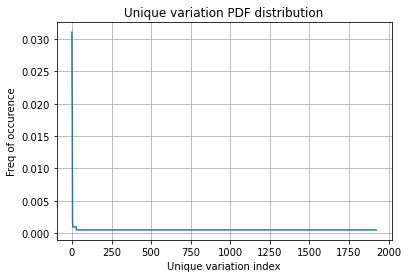

In [ ]:
#Plotting pdf-
frq=variation_freq.values/(variation_freq.values).sum()
plt.plot(frq)
plt.title("Unique variation PDF distribution")
plt.xlabel("Unique variation index")
plt.ylabel("Freq of occurence")
plt.grid()
plt.show()

##Conclusion - 

This shows that very few variations are occuring large times and most of the variations are occuring few times ie more than 1 and less than 4 and this curve is also failing very sharply in order to prove this point.

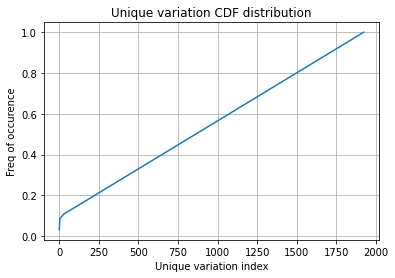

In [ ]:
#plotting CDF-
cumm_frq=np.cumsum(frq)
plt.plot(cumm_frq)
plt.title("Unique variation CDF distribution")
plt.xlabel("Unique variation index")
plt.ylabel("Freq of occurence")
plt.grid()
plt.show()


##Q) Is Variation a good feature for predicting classes-

Ans) We will be creating a model by using only variation as a standalone feature and will try to predict the classes ,and then would be looking at the performance metric ie log loss , if log loss of that built model is less than log loss of random model ie 2.5 then it will be considerd as a good feature to include for further prediction.



In [27]:
#Converting Categorical feature 'variation' into numerical vector for ML-
#Using response coding in order to convert the categorical feature-
from tqdm import*
def response_coding(X_Train,X_CV,X_Test,Y_Train):
  data={'Variation':X_Train['Variation'],'Labels':Y_Train}
  temp=pd.DataFrame(data=data,columns=['Variation','Labels','Train_Variation','CV_Variation','Test_Variation'])
  response_coding=np.zeros((len(temp['Variation'].unique()),9))
  dict={}
  for i in tqdm(range(len(temp['Variation'].unique().tolist()))):
    for j in range(1,10):
      a=(len(temp.loc[(temp['Variation']==(temp['Variation'].unique().tolist()[i]))& (temp['Labels']==j)])+10)/(len(temp.loc[(temp['Variation']==(temp['Variation'].unique().tolist()[i]))])+90)
      response_coding[i][j-1]=a
    dict[temp['Variation'].unique().tolist()[i]]=response_coding[i]
  for i in range(len(X_Train['Variation'])):
    if (X_Train['Variation'].iloc[i] in list(dict.keys())):
      temp['Train_Variation'].iloc[i]=dict[X_Train['Variation'].iloc[i]]
  for i in range(len(X_CV['Gene'])):
    if (X_CV['Variation'].iloc[i] in list(dict.keys())):
      temp['CV_Variation'].iloc[i]=dict[X_Train['Variation'].iloc[i]]
    else:
      temp['CV_Variation'].iloc[i]=[1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9]

  for i in range(len(X_Test['Variation'])):
    if (X_Test['Variation'].iloc[i] in list(dict.keys())):
      temp['Test_Variation'].iloc[i]=dict[X_Train['Variation'].iloc[i]]
    else:
      temp['Test_Variation'].iloc[i]=[1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9]
  return temp
  


In [28]:
S=response_coding(X_Train,X_CV,X_Test,Y_Train)

100%|██████████| 1923/1923 [00:41<00:00, 46.18it/s]
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [29]:
response_label_encoding_train=S['Train_Variation'].tolist()
response_label_encoding_cv=(S['CV_Variation'].loc[S['CV_Variation'].isnull()==False]).tolist()
response_label_encoding_test=(S['Test_Variation'].loc[S['Test_Variation'].isnull()==False]).tolist()


In [ ]:
#Building a LR model on gene feature using response label encoding -
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss
from tqdm import *
C=[10**i for i in range(-5,1)]
print('When converting categorical feature using reponse label encoding the loss value are as follows-')
for j in C:
  print("For alpha=",j)
  clf=SGDClassifier(alpha=j,loss='log')
  clf.fit(response_label_encoding_train,Y_Train)
  clf1=CalibratedClassifierCV(clf)
  clf1.fit(response_label_encoding_train,Y_Train)
  y_pred_train=clf1.predict_proba(response_label_encoding_train)
  print("Train log loss is:",logloss(Y_Train,y_pred_train))
  y_pred_cv=clf1.predict_proba(response_label_encoding_cv)
  print("CV log loss is:",logloss(Y_CV,y_pred_cv))
  y_pred_test=clf1.predict_proba(response_label_encoding_test)
  print("Test log loss is:",logloss(Y_Test,y_pred_test))
  print('*'*50)

def logloss(y_true,y_pred):
  loss=log_loss(y_true,y_pred)
  return loss

When converting categorical feature using reponse label encoding the loss value are as follows-
For alpha= 1e-05
Train log loss is: 0.36947143815894384
CV log loss is: 2.1298456272054027
Test log loss is: 2.2585867334796093
**************************************************
For alpha= 0.0001
Train log loss is: 0.6514177146961334
CV log loss is: 1.9877426201964392
Test log loss is: 2.102213306394999
**************************************************
For alpha= 0.001
Train log loss is: 0.9315928165367013
CV log loss is: 1.922648115575882
Test log loss is: 2.0134838985073547
**************************************************
For alpha= 0.01
Train log loss is: 1.0028270464135314
CV log loss is: 1.9131648446641956
Test log loss is: 1.9828056768485987
**************************************************
For alpha= 0.1
Train log loss is: 1.027388919563637
CV log loss is: 1.9115542104303118
Test log loss is: 1.97731057007676
**************************************************
For alpha= 1
Train l

In [ ]:
def logloss(y_true,y_pred):
  loss=log_loss(y_true,y_pred)
  return loss

In [30]:
#Performing one hot encoding on categorical feature-
from sklearn.feature_extraction.text import CountVectorizer
clf=CountVectorizer()
clf2=clf.fit(X_Train['Variation'],Y_Train)
Variation_one_hot_encoding_train=clf2.transform(X_Train['Variation'])
Variation_one_hot_encoding_cv=clf2.transform(X_CV['Variation'])
Variation_one_hot_encoding_test=clf2.transform(X_Test['Variation'])


In [ ]:
#Building a LR model on gene feature using one hot encoding -
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss
from tqdm import *
C=[10**i for i in range(-5,1)]
print('When converting categorical feature using one hot  encoding the loss value are as follows-')
for j in C:
  print("For alpha=",j)
  clf=SGDClassifier(alpha=j,loss='log')
  clf.fit(Variation_one_hot_encoding_train,Y_Train)
  clf1=CalibratedClassifierCV(clf)
  clf1.fit(Variation_one_hot_encoding_train,Y_Train)
  y_pred_train=clf1.predict_proba(Variation_one_hot_encoding_train)
  print("Train log loss is:",logloss(Y_Train,y_pred_train))
  y_pred_cv=clf1.predict_proba(Variation_one_hot_encoding_cv)
  print("CV log loss is:",logloss(Y_CV,y_pred_cv))
  y_pred_test=clf1.predict_proba(Variation_one_hot_encoding_test)
  print("Test log loss is:",logloss(Y_Test,y_pred_test))
  print('*'*50)


When converting categorical feature using one hot  encoding the loss value are as follows-
For alpha= 1e-05
Train log loss is: 0.6650136901133853
CV log loss is: 1.6910827953567593
Test log loss is: 1.7176261582411114
**************************************************
For alpha= 0.0001
Train log loss is: 0.7417086630536568
CV log loss is: 1.680794600724546
Test log loss is: 1.7152725862795903
**************************************************
For alpha= 0.001
Train log loss is: 1.2291402945073637
CV log loss is: 1.6946530197244167
Test log loss is: 1.71775523082421
**************************************************
For alpha= 0.01
Train log loss is: 1.5626419845097457
CV log loss is: 1.6989154046246926
Test log loss is: 1.7273523415699168
**************************************************
For alpha= 0.1
Train log loss is: 1.66322223792665
CV log loss is: 1.7138220193139442
Test log loss is: 1.748834217260819
**************************************************
For alpha= 1
Train log loss

##Conclusion-

Here we can see that one hot encoding performs better as compared with response label encoding , and also the train,cv and test loss has reduced drastically as compared to a random model log loss , hence we can conclude that gene feature is a good feature in predicitng the different type of classes.

##Hyperparameter tunning result- 

Based on the above result we can take the ideal value of alpha to be 0.0001

In [ ]:
j=0.0001
print("For  best value of alpha=",j)
clf=SGDClassifier(alpha=j,loss='log')
clf.fit(Variation_one_hot_encoding_train,Y_Train)
clf1=CalibratedClassifierCV(clf)
clf1.fit(Variation_one_hot_encoding_train,Y_Train)
y_pred_train=clf1.predict_proba(Variation_one_hot_encoding_train)
print("Train log loss is:",logloss(Y_Train,y_pred_train))
y_pred_cv=clf1.predict_proba(Variation_one_hot_encoding_cv)
print("CV log loss is:",logloss(Y_CV,y_pred_cv))
y_pred_test=clf1.predict_proba(Variation_one_hot_encoding_test)
print("Test log loss is:",logloss(Y_Test,y_pred_test))
print('*'*50)


For  best value of alpha= 0.0001
Train log loss is: 0.7326899866081494
CV log loss is: 1.6799044902265217
Test log loss is: 1.7136186552571484
**************************************************


##Q) Is the variation feature stable?

Ans-) We would be looking at the common no of variations in both test and cv dataset w.r.t train dataset, if % of common variations among all the three dataset is high then we can say that this feature is temporarily stable otherwise it is not!

In [ ]:
train_variation_set=set(X_Train['Variation'].unique())
cv_variation_set=set(X_CV['Variation'].unique())
test_variation_set=set(X_Test['Variation'].unique())
print("{}% of genes sets are present in test and train dataset".format(len(test_variation_set.intersection(train_variation_set))/(len(test_variation_set))*100))
print("{}% of genes sets are present in cv and train dataset".format(len(cv_variation_set.intersection(train_variation_set))/(len(cv_variation_set))*100))

3.5541195476575123% of genes sets are present in test and train dataset
2.2587268993839835% of genes sets are present in cv and train dataset


##Conclusion- 

As you can see that only 2-3% of variation data is present in cv and test dataset when compared with training dataset , hence the overlap is very very small among the three, therefore we can say that variation feature is temporarily unstable but this feature being an unstable one also help us in reducing the test log loss by a noticible margin when compared to a random model test log loss value , hence we can take this feature ahead for further prediction.

##Univariate analysis on Text Feature-

##Q) What is the no of unique words in Text feature and its distribution-

In [ ]:
#Printing no of unique words in text feature and their occurences-
from collections import Counter
temp=X_Train['Text'].apply(lambda x: x.split())
dict={}
l1=np.sum(temp.values)
z=Counter(l1)
print("Total no of unique no of words are:", len(z.keys()))



Total no of unique no of words are: 145109


In [ ]:
print(list(z.values()))

[1777, 565, 816, 878, 13590, 42487, 5647, 17698, 16243, 1385, 116, 607, 352, 2017, 44891, 7106, 18269, 17462, 1610, 6612, 24497, 10130, 122757, 16274, 581, 3514, 8754, 708, 5802, 185, 3003, 7358, 5890, 2925, 116918, 5739, 42725, 215, 963, 8076, 310, 5649, 4741, 1276, 72127, 7729, 12881, 5071, 23860, 7148, 4231, 926, 1326, 10411, 8001, 5422, 9969, 17587, 11784, 1341, 44, 2857, 48228, 1629, 2271, 3, 9134, 700, 17134, 1092, 2519, 12213, 1524, 3744, 56, 13079, 151, 39, 1161, 81701, 12552, 333, 26136, 1924, 804, 1636, 1156, 200, 785, 14, 12528, 260, 6571, 6592, 1135, 21224, 472, 876, 31947, 10686, 121, 5471, 1568, 7605, 2996, 973, 3168, 4102, 3690, 324, 41, 456, 110, 22, 68635, 68512, 3089, 7725, 12, 13, 1, 3540, 1526, 2133, 3149, 5552, 8, 2911, 140, 14347, 6026, 22, 3423, 6678, 12299, 2066, 11739, 1431, 135, 118, 252, 1, 4686, 2400, 1, 2076, 196, 1, 5428, 893, 148, 5026, 5515, 2701, 186, 41084, 10596, 2919, 38, 49586, 3314, 3021, 8801, 5825, 5937, 53374, 1012, 14929, 6659, 8636, 3194, 1635

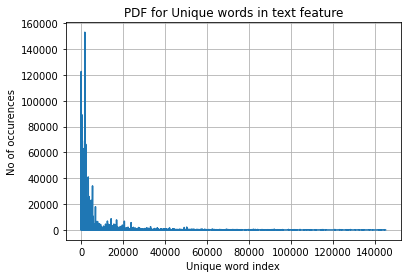

In [ ]:
plt.plot(list(z.values()))
plt.title("PDF for Unique words in text feature")
plt.xlabel("Unique word index")
plt.ylabel("No of occurences")
plt.grid()
plt.show()

##Conclusion-

There are few words that have occured many no of times , there are also few words that have occured medium no of times and also there are words that have occured very few times.

In [41]:
#Converting text feature into numerical vector using one hot encoding-
clf=CountVectorizer(min_df=3)
clf1=clf.fit(X_Train['Text'],Y_Train)
text_one_hot_encoding_train=clf.transform(X_Train['Text'])
text_one_hot_encoding_cv=clf.transform(X_CV['Text'])
text_one_hot_encoding_test=clf.transform(X_Test['Text'])
  
    


In [42]:
#Normalizing the one hot encoding output-
from sklearn.preprocessing import normalize
text_one_hot_encoding_train=normalize(text_one_hot_encoding_train,axis=0)
text_one_hot_encoding_cv=normalize(text_one_hot_encoding_cv,axis=0)
text_one_hot_encoding_test=normalize(text_one_hot_encoding_test,axis=0)


##Q) Is Text a good feature for predicting classes-

Ans) We will be creating a model by using only variation as a standalone feature and will try to predict the classes ,and then would be looking at the performance metric ie log loss , if log loss of that built model is less than log loss of random model ie 2.5 then it will be considerd as a good feature to include for further prediction.


In [ ]:
#Performing Hyperparameter Tunning-
C=[10**i for i in range(-5,1)]
print('When converting categorical feature using one hot  encoding the loss value are as follows-')
for j in C:
  print("For alpha=",j)
  clf=SGDClassifier(alpha=j,loss='log')
  clf.fit(text_one_hot_encoding_train,Y_Train)
  clf1=CalibratedClassifierCV(clf)
  clf1.fit(text_one_hot_encoding_train,Y_Train)
  y_pred_train=clf1.predict_proba(text_one_hot_encoding_train)
  print("Train log loss is:",logloss(Y_Train,y_pred_train))
  y_pred_cv=clf1.predict_proba(text_one_hot_encoding_cv)
  print("CV log loss is:",logloss(Y_CV,y_pred_cv))
  y_pred_test=clf1.predict_proba(text_one_hot_encoding_test)
  print("Test log loss is:",logloss(Y_Test,y_pred_test))
  print('*'*50)

When converting categorical feature using one hot  encoding the loss value are as follows-
For alpha= 1e-05
Train log loss is: 1.0025765943820657
CV log loss is: 1.3312914072631092
Test log loss is: 1.4197445818977739
**************************************************
For alpha= 0.0001
Train log loss is: 0.6777635274239273
CV log loss is: 1.1625113319998757
Test log loss is: 1.3104144330656535
**************************************************
For alpha= 0.001
Train log loss is: 0.6388745824049342
CV log loss is: 1.1515250975845948
Test log loss is: 1.3178806985849578
**************************************************
For alpha= 0.01
Train log loss is: 0.8372729647038192
CV log loss is: 1.2167419407418123
Test log loss is: 1.3942607918901766
**************************************************
For alpha= 0.1
Train log loss is: 1.3178504306221854
CV log loss is: 1.437842623319407
Test log loss is: 1.5247156510795634
**************************************************
For alpha= 1
Train log

##Conclusion-

Looking at this, the best value of hyperparameter alpha =0.0001

In [ ]:
#Training with best value of alpha and computing all the losses-

j=0.0001
print("For  best value of alpha=",j)
clf=SGDClassifier(alpha=j,loss='log')
clf.fit(text_one_hot_encoding_train,Y_Train)
clf1=CalibratedClassifierCV(clf)
clf1.fit(text_one_hot_encoding_train,Y_Train)
y_pred_train=clf1.predict_proba(text_one_hot_encoding_train)
print("Train log loss is:",logloss(Y_Train,y_pred_train))
y_pred_cv=clf1.predict_proba(text_one_hot_encoding_cv)
print("CV log loss is:",logloss(Y_CV,y_pred_cv))
y_pred_test=clf1.predict_proba(text_one_hot_encoding_test)
print("Test log loss is:",logloss(Y_Test,y_pred_test))
print('*'*50)

For  best value of alpha= 0.0001
Train log loss is: 0.6609292108903086
CV log loss is: 1.1754143669452783
Test log loss is: 1.3160443817097887
**************************************************


##Q) Is the Text feature stable?

Ans-) We would be looking at the common no of variations in both test and cv dataset w.r.t train dataset, if % of common variations among all the three dataset is high then we can say that this feature is temporarily stable otherwise it is not!

In [ ]:
train_variation_set=set(list(z.keys()))
temp=X_CV['Text'].apply(lambda x: x.split())
cv_variation_set=set(np.sum(temp.values))
temp=X_Test['Text'].apply(lambda x: x.split())
test_variation_set=set(np.sum(temp.values))
print("{}% of genes sets are present in test and train dataset".format(len(test_variation_set.intersection(train_variation_set))/(len(test_variation_set))*100))
print("{}% of genes sets are present in cv and train dataset".format(len(cv_variation_set.intersection(train_variation_set))/(len(cv_variation_set))*100))

77.78710196574319% of genes sets are present in test and train dataset
79.5779441797141% of genes sets are present in cv and train dataset


##Conclusion-

Text feature is an stable feature since around 80% of data are present in both cv and test dataset when compared with training dataset and also the losses obtained by this feature(ie cv, test) is also the lowest when compared with other feature ie "Gene' and 'Variations', Hence it is an important feature than can be used for future predictions of classes.

#Response label encoding on text feature -

In [31]:
from collections import defaultdict
from tqdm import * 
data={'Text':X_Train['Text'],'Labels':Y_Train}
temp=pd.DataFrame(data=data,columns=['Text','Labels'])
dict_list=[]
for i in range(1,10):
  dictionary = defaultdict(int)
  for k in temp['Text'].loc[temp['Labels']==i]:
    for j in k.split():
      dictionary[j]=dictionary[j]+1
  dict_list.append(dictionary)
  
    
    
          

In [32]:
#Function for total  dictionary-
dictionary = defaultdict(int)
total_dict=[]
  
for i in temp['Text']:
  for j in i.split():
    dictionary[j]=dictionary[j]+1

  total_dict.append(dictionary)
  



In [37]:
#Response label encoding for text features-
import math as m
response_coding=np.zeros((len(X_Test),9))

for i in range(len(dict_list)):
  for j in range(len(X_Test['Text'])):
    prob=0
    for k in X_Test['Text'].iloc[j].split():
      if k in dict_list[i].keys():
        prob=prob+m.log(((dict_list[i].get(k))+10)/(total_dict[0].get(k)+90))
      else:
        prob=1/9
    response_coding[j][i]=m.exp(prob/len(X_Test['Text'].iloc[j].split()))

      



In [38]:
response_coding_text_test=response_coding

In [ ]:
#Calling the response label encoding function on Train data-
response_coding_text_train=response_coding
response_coding_text_CV=response_coding
response_coding_text_test=response_coding

In [39]:
#Normalizing the response label encoding-
response_coding_text_train_norm=(response_coding_text_train/(response_coding_text_train.sum(axis=1).reshape(-1,1)))
response_coding_text_CV_norm=(response_coding_text_CV/(response_coding_text_CV.sum(axis=1).reshape(-1,1)))
response_coding_text_test_norm=(response_coding_text_test/(response_coding_text_test.sum(axis=1).reshape(-1,1)))

#Machine learning Model-

##Stacking up all three features-

In [43]:
#Stacking up text, gene and variation together to create one single matrix(one hot encoding)-
from scipy.sparse import hstack
X_Train_one_hot_encoding_gene_var=hstack((gene_one_hot_encoding_train,Variation_one_hot_encoding_train))
X_Train_one_hot_encoding=hstack((X_Train_one_hot_encoding_gene_var,text_one_hot_encoding_train))
X_CV_one_hot_encoding_gene_var=hstack((gene_one_hot_encoding_cv,Variation_one_hot_encoding_cv))
X_CV_one_hot_encoding=hstack((X_CV_one_hot_encoding_gene_var,text_one_hot_encoding_cv))
X_Test_one_hot_encoding_gene_var=hstack((gene_one_hot_encoding_test,Variation_one_hot_encoding_test))
X_Test_one_hot_encoding=hstack((X_Test_one_hot_encoding_gene_var,text_one_hot_encoding_test))


In [44]:
print(X_Train_one_hot_encoding.shape)
print(X_CV_one_hot_encoding.shape)
print(X_Test_one_hot_encoding.shape)

(2124, 56056)
(532, 56056)
(665, 56056)


In [45]:
#Stacking up text, gene and variation together to create one single matrix(one hot encoding)-
from scipy.sparse import hstack
Gene_response_label_encoding_train=np.array(Gene_response_label_encoding_train)
response_label_encoding_train=np.array(response_label_encoding_train)

X_Train_response_label_encoding_gene_var=np.hstack((Gene_response_label_encoding_train,response_label_encoding_train))
X_Train_response_label_encoding=np.hstack((X_Train_response_label_encoding_gene_var,response_coding_text_train_norm))
X_CV_response_label_encoding_gene_var=np.hstack((np.array(Gene_response_label_encoding_cv),np.array(response_label_encoding_cv)))
X_CV_response_label_encoding=np.hstack((X_CV_response_label_encoding_gene_var,response_coding_text_CV_norm))
X_Test_response_label_encoding_gene_var=np.hstack((np.array(Generesponse_label_encoding_test),np.array(response_label_encoding_test)))
X_Test_response_label_encoding=np.hstack((X_Test_response_label_encoding_gene_var,response_coding_text_test_norm))


In [46]:
print(X_Train_response_label_encoding.shape)
print(X_CV_response_label_encoding.shape)
print(X_Test_response_label_encoding.shape)

(2124, 27)
(532, 27)
(665, 27)


#Base Line model-

##1) Naive Byas model-

In [42]:
#Using Multinomial NB with one hot encoded features-
from sklearn.naive_bayes import MultinomialNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss

alpha=[0.001,0.1,1.0,50,100]
for i in alpha:
  print("For alpha={}".format(i))
  clf=MultinomialNB(alpha=i)
  clf.fit(X_Train_one_hot_encoding,Y_Train)
  clf2=CalibratedClassifierCV(clf,method='sigmoid')
  clf2.fit(X_Train_one_hot_encoding,Y_Train)
  y_pred_train_prob=clf2.predict_proba(X_Train_one_hot_encoding)
  y_pred_cv_prob=clf2.predict_proba(X_CV_one_hot_encoding)
  y_pred_test_prob=clf2.predict_proba(X_Test_one_hot_encoding)
  print("Train loss is:",log_loss(Y_Train,y_pred_train_prob))
  print("CV loss is:",log_loss(Y_CV,y_pred_cv_prob))
  print("Test loss is:",log_loss(Y_Test,y_pred_test_prob))
  print('*'*50)






For alpha=0.001
Train loss is: 0.8198071028511479
CV loss is: 1.2533368951598811
Test loss is: 1.3657151122193567
**************************************************
For alpha=0.1
Train loss is: 0.8466185072715817
CV loss is: 1.2520587151033657
Test loss is: 1.366211120113914
**************************************************
For alpha=1.0
Train loss is: 0.8965934079969137
CV loss is: 1.260072596769224
Test loss is: 1.3390490990260129
**************************************************
For alpha=50
Train loss is: 1.0878083817706818
CV loss is: 1.3615576392980133
Test loss is: 1.4309589615031637
**************************************************
For alpha=100
Train loss is: 1.0824009566147699
CV loss is: 1.35539062124988
Test loss is: 1.4350879346089374
**************************************************


##Conclusion- 

As we can see that when the value of aplha is 1.0 we are seeing the lowest loss amongst the lot, hence best value of aplha should be 1.0

In [44]:
#For best value of aplha=1.0 
alpha_optimal=1.0
print("For best value of alpha={}".format(alpha_optimal))
clf=MultinomialNB(alpha=alpha_optimal)
clf.fit(X_Train_one_hot_encoding,Y_Train)
clf2=CalibratedClassifierCV(clf,method='sigmoid')
clf2.fit(X_Train_one_hot_encoding,Y_Train)
y_pred_train_prob=clf2.predict_proba(X_Train_one_hot_encoding)
y_pred_cv_prob=clf2.predict_proba(X_CV_one_hot_encoding)
y_pred_test_prob=clf2.predict_proba(X_Test_one_hot_encoding)
print("Train loss is:",log_loss(Y_Train,y_pred_train_prob))
print("CV loss is:",log_loss(Y_CV,y_pred_cv_prob))
print("Test loss is:",log_loss(Y_Test,y_pred_test_prob))
print('*'*50)


For best value of alpha=1.0
Train loss is: 0.8965934079969137
CV loss is: 1.260072596769224
Test loss is: 1.3390490990260129
**************************************************


#Feature importance and interpretability by naive bayes model during prediction-



In [95]:
#Calculating feature importance-

from sklearn.feature_extraction.text import CountVectorizer
gene_feature_count=CountVectorizer()
variation_feature_count=CountVectorizer()
text_feature_count=CountVectorizer(min_df=3)
gene_feature_count.fit(X_Train['Gene'])
gene_vocab=gene_feature_count.get_feature_names()
variation_feature_count.fit(X_Train['Variation'])
variation_vocab=variation_feature_count.get_feature_names()
text_feature_count.fit(X_Train['Text'])
text_vocab=text_feature_count.get_feature_names()




In [96]:
total_feat_vocab=gene_vocab+variation_vocab+text_vocab

In [109]:
#Code for interpretability-
from sklearn.naive_bayes import MultinomialNB
clf_2=MultinomialNB(alpha=0.1)
clf_2.fit(X_Train_one_hot_encoding,Y_Train)
imp_fea=-abs(clf_2.coef_)
pred_clss_ft_match=[]
for m in range(9):
  l4=[]
  gene_dict={}
  var_dict={}
  text_dict={}

  for i in np.argsort(imp_fea,axis=1)[:,:100][m].tolist():
    l4.append(total_feat_vocab[i])
  if X_Test['Gene'].iloc[2].lower() in l4:
    gene_dict[X_Test['Gene'].iloc[2].lower()]=1
  else:
    pass
  if X_Test['Variation'].iloc[2].lower() in l4:
    var_dict[X_Test['Variation'].iloc[2].lower()]=1
  else:
    pass
  for k in X_Test['Text'].iloc[2].split(' '):
    if k.lower() in l4:
      text_dict[k]=1
    else:
      pass
  pred_clss_ft_match.append((len(gene_dict)+len(var_dict)+len(text_dict)))
  



  
  
    





In [110]:
print(pred_clss_ft_match)

[1, 1, 1, 0, 1, 0, 0, 0, 0]


##2nd base model - K- Nearest neighbour

Since KNN model does not work in an effective manner when dimensionality of data is high because of curse of dimensionality , so we cant use one-hot encoding since it has higher dimension so in this case we will be using response label encoded features.

In [40]:
#Hyperparameter tunnig + calibaration-
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss
n_neighbour=[5,10,15,20,100]
for i in n_neighbour:
  print("For nearest neighbour value as {}-".format(i))
  Knn_model=KNeighborsClassifier(n_neighbors=i)
  Knn_model.fit(X_Train_response_label_encoding,Y_Train)
  calibrated_prob=CalibratedClassifierCV(Knn_model,method='sigmoid')
  calibrated_prob.fit(X_Train_response_label_encoding,Y_Train)
  y_pred_train=calibrated_prob.predict_proba(X_Train_response_label_encoding)
  print("Train log loss is",log_loss(Y_Train,y_pred_train))
  y_pred_cv=calibrated_prob.predict_proba(X_CV_response_label_encoding)
  print("CV log loss is",log_loss(Y_CV,y_pred_cv))
  y_pred_test=calibrated_prob.predict_proba(X_Test_response_label_encoding)
  print("Test log loss is",log_loss(Y_Test,y_pred_test))
  print('*'*50)






For nearest neighbour value as 5-
Train log loss is 0.27003359758840084
CV log loss is 2.0461376381082705
Test log loss is 2.1679304780036306
**************************************************
For nearest neighbour value as 10-
Train log loss is 0.3471606247959102
CV log loss is 2.090099303083501
Test log loss is 2.2406863363893232
**************************************************
For nearest neighbour value as 15-
Train log loss is 0.40568033473815124
CV log loss is 2.1095881580713365
Test log loss is 2.268357755635166
**************************************************
For nearest neighbour value as 20-
Train log loss is 0.4591716729323448
CV log loss is 2.082861120909277
Test log loss is 2.2373059564835702
**************************************************
For nearest neighbour value as 100-
Train log loss is 0.6150013999212902
CV log loss is 2.0992096247090957
Test log loss is 2.178565035370119
**************************************************


##Conclusion - 

Best value of hyperparameter is 5 where we are getting minimum cv_log_loss as compared to other hyperparameters...



In [41]:
#Performance tunnnig with best value of hyperparameter-
i=5
print("Best value of hyperparameter as {}-".format(i))
Knn_model=KNeighborsClassifier(n_neighbors=i)
Knn_model.fit(X_Train_response_label_encoding,Y_Train)
calibrated_prob=CalibratedClassifierCV(Knn_model,method='sigmoid')
calibrated_prob.fit(X_Train_response_label_encoding,Y_Train)
y_pred_train=calibrated_prob.predict_proba(X_Train_response_label_encoding)
print("Train log loss is",log_loss(Y_Train,y_pred_train))
y_pred_cv=calibrated_prob.predict_proba(X_CV_response_label_encoding)
print("CV log loss is",log_loss(Y_CV,y_pred_cv))
y_pred_test=calibrated_prob.predict_proba(X_Test_response_label_encoding)
print("Test log loss is",log_loss(Y_Test,y_pred_test))
print('*'*50)



Best value of hyperparameter as 5-
Train log loss is 0.27003359758840084
CV log loss is 2.0461376381082705
Test log loss is 2.1679304780036306
**************************************************


In [75]:
#Interpretability code-
import copy
X_Test_response_label_encoding_copy=copy.deepcopy(X_Test_response_label_encoding)
from scipy.spatial.distance import cdist
dist=cdist(X_Test_response_label_encoding,X_Test_response_label_encoding_copy)
top_5_neigh=np.argsort(dist,axis=1)[:,:n_neighbour]
print(Y_Test.iloc[top_5_neigh[indicies].tolist()])


In [84]:
#Creating confusion matrix-
from sklearn.metrics import confusion_matrix
y_pred=Knn_model.predict(X_Test_response_label_encoding)
cm=confusion_matrix(Y_Test.values,y_pred)

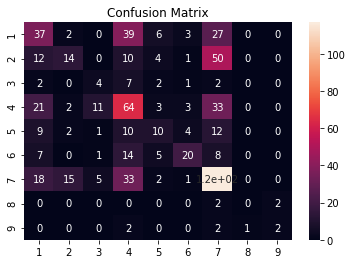

In [88]:
#Displaying confusion matrix-
sns.heatmap(cm,annot=True,xticklabels=[1,2,3,4,5,6,7,8,9],yticklabels=[1,2,3,4,5,6,7,8,9])
plt.title("Confusion Matrix")
plt.show()

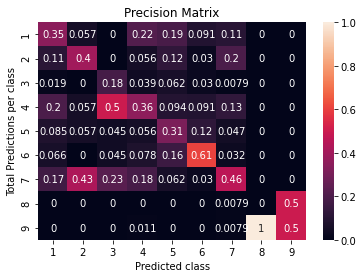

In [89]:
#Displaying Precision Matrix-
Precision=cm/cm.sum(axis=0)
sns.heatmap(Precision,annot=True,xticklabels=[1,2,3,4,5,6,7,8,9],yticklabels=[1,2,3,4,5,6,7,8,9])
plt.title("Precision Matrix")
plt.ylabel("Total Predictions per class")
plt.xlabel("Predicted class")
plt.show()

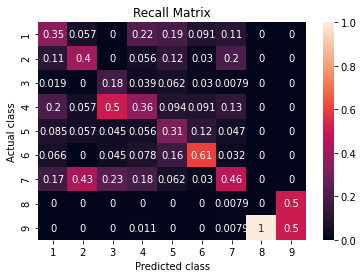

In [90]:
#Displaying Recall Matrix-
Recall=cm/cm.sum(axis=1).reshape(-1,1)
sns.heatmap(Precision,annot=True,xticklabels=[1,2,3,4,5,6,7,8,9],yticklabels=[1,2,3,4,5,6,7,8,9])
plt.title("Recall Matrix")
plt.ylabel("Actual class")
plt.xlabel("Predicted class")
plt.show()


#Model 3- Logistic Regression with balanced dataset-

In [111]:
from sklearn.linear_model import LogisticRegression
C=[0.0001,0.001,0.1,1,5]
for i in C:
  print("For C={}-".format(i))
  LR=LogisticRegression(C=i,class_weight='balanced')
  LR.fit(X_Train_one_hot_encoding,Y_Train)
  calibrated_prob=CalibratedClassifierCV(LR,method='sigmoid')
  calibrated_prob.fit(X_Train_one_hot_encoding,Y_Train)
  y_pred_train=calibrated_prob.predict_proba(X_Train_one_hot_encoding)
  print("Train log loss is-",log_loss(Y_Train,y_pred_train))
  y_pred_cv=calibrated_prob.predict_proba(X_CV_one_hot_encoding)
  print("CV log loss is-",log_loss(Y_CV,y_pred_cv))
  y_pred_test_prob=calibrated_prob.predict_proba(X_Test_one_hot_encoding)
  print("Test log loss is-",log_loss(Y_Test,y_pred_test_prob))
  print('*'*50)








For C=0.0001-
Train log loss is- 0.9984040349592251
CV log loss is- 1.1406672416149546
Test log loss is- 1.2820036611499779
**************************************************
For C=0.001-
Train log loss is- 0.9933381130143091
CV log loss is- 1.1375810821782986
Test log loss is- 1.2753706204000288
**************************************************
For C=0.1-
Train log loss is- 0.6979536621250528
CV log loss is- 1.0249085795313786
Test log loss is- 1.1657826592510474
**************************************************
For C=1-
Train log loss is- 0.5484655834304554
CV log loss is- 1.0096148089773336
Test log loss is- 1.1413135805793302
**************************************************
For C=5-


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Train log loss is- 0.4917339525081344
CV log loss is- 1.0119063351684268
Test log loss is- 1.1394721278549709
**************************************************


##Conclusion - 

Best value of hyperparameter C is 0.1

In [112]:
#Training with best value of hyperparameter ie C=0.1
i=0.1
print("For best value of C={}-".format(i))
LR=LogisticRegression(C=i,class_weight='balanced')
LR.fit(X_Train_one_hot_encoding,Y_Train)
calibrated_prob=CalibratedClassifierCV(LR,method='sigmoid')
calibrated_prob.fit(X_Train_one_hot_encoding,Y_Train)
y_pred_train=calibrated_prob.predict_proba(X_Train_one_hot_encoding)
print("Train log loss is-",log_loss(Y_Train,y_pred_train))
y_pred_cv=calibrated_prob.predict_proba(X_CV_one_hot_encoding)
print("CV log loss is-",log_loss(Y_CV,y_pred_cv))
y_pred_test_prob=calibrated_prob.predict_proba(X_Test_one_hot_encoding)
print("Test log loss is-",log_loss(Y_Test,y_pred_test_prob))
print('*'*50)

For best value of C=0.1-
Train log loss is- 0.6979536621250528
CV log loss is- 1.0249085795313786
Test log loss is- 1.1657826592510474
**************************************************


In [121]:
#Code for feature importance-

print(abs(LR.coef_)[0])

[0.08861515 0.04839137 0.12119708 ... 0.00392698 0.0047455  0.0058852 ]


In [133]:
#Sorting the array to get the top 100 most imp features for every class-
y=np.argsort(-abs(LR.coef_),axis=1)[:,:100]

In [134]:
print(y)

[[ 1955  1293   542   227   739    59   230    27   332   113    26    67
     64   161   206   159   176     5   204   137   174    89   189   177
    208     2   191   232    81   121   164   188   119     6   101   133
     40     0  1842  1677   144 55718   351 26610   193   131 54926 23102
     88   100 39238   198    25 35087  7645 27370 36874 42664 47881 12376
    740  1416   816 23106 39686 11626 48107  1641 23632 42665 10826 43712
  48738 22301  8061 55324 22425 22508 22286 27523 34145 34308 42666 38074
  26886 42669 30625 30433 33566 44047 31078 11802 17047 33892  9204   900
   1981    45 50783  2091]
 [  113     0   739   740    27    59   100   227    26    28   197   174
   1451   332   542   160  1842    62   204  1955   159 39238   175   191
    232    75    64   148   675    25    66   101  1293   103   134   107
     46   230 18085   198   133   672 24072   229 55318     5 50075 31495
  14389  8775 34012 31496 32256 25750 39704  1925  1365 16254 16585 20696
   1736 307

In [131]:
print(X_Test_one_hot_encoding.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [156]:
#Feature importance and interpretability-
y=np.argsort(-abs(LR.coef_),axis=1)[:,:100]
total_feature_list=[]
for k in range(len(y)):
  gene_dict=[]
  var_dict=[]
  text_dict=[]
  num_gene_present=0
  num_var_present=0
  num_text_present=0
  for l in range(len(y[k])):
    gene_dict.append(total_feat_vocab[y[k][l]])
    var_dict.append(total_feat_vocab[y[k][l]])
    text_dict.append(total_feat_vocab[y[k][l]])
  if X_Test['Gene'].iloc[12].lower() in gene_dict:
    num_gene_present+=1
  if X_Test['Variation'].iloc[12].lower() in var_dict:
    num_var_present+=1
  for m in (X_Test['Text'].iloc[12].split(' ')):
    if m.lower() in text_dict:
      num_text_present+=1
  total_feature_list.append(num_gene_present+num_var_present+num_text_present)
  
  




  
  






In [157]:
print(total_feature_list)

[112, 118, 30, 257, 109, 35, 304, 4, 0]


In [158]:
#Priniting confusion matrix-
y_pred=calibrated_prob.predict(X_Test_one_hot_encoding)
cm=confusion_matrix(Y_Test.values,y_pred)

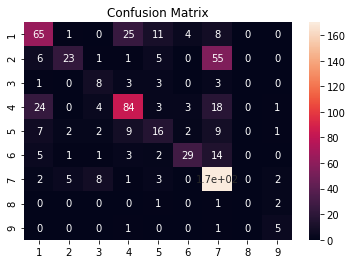

In [159]:
#Displaying confusion matrix-
sns.heatmap(cm,annot=True,xticklabels=[1,2,3,4,5,6,7,8,9],yticklabels=[1,2,3,4,5,6,7,8,9])
plt.title("Confusion Matrix")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


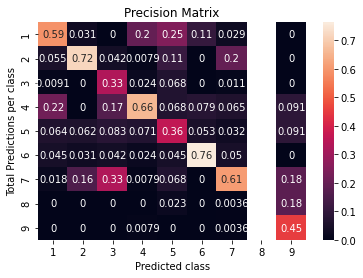

In [160]:
#Displaying Precision Matrix-
Precision=cm/cm.sum(axis=0)
sns.heatmap(Precision,annot=True,xticklabels=[1,2,3,4,5,6,7,8,9],yticklabels=[1,2,3,4,5,6,7,8,9])
plt.title("Precision Matrix")
plt.ylabel("Total Predictions per class")
plt.xlabel("Predicted class")
plt.show()

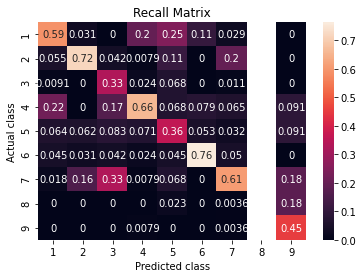

In [161]:
#Displaying Recall Matrix-
Recall=cm/cm.sum(axis=1).reshape(-1,1)
sns.heatmap(Precision,annot=True,xticklabels=[1,2,3,4,5,6,7,8,9],yticklabels=[1,2,3,4,5,6,7,8,9])
plt.title("Recall Matrix")
plt.ylabel("Actual class")
plt.xlabel("Predicted class")
plt.show()

##Model 4- Logistic Regression with Class imbalanced-

In [162]:
C=[0.0001,0.001,0.1,1,5]
for i in C:
  print("For C={}-".format(i))
  LR=LogisticRegression(C=i)
  LR.fit(X_Train_one_hot_encoding,Y_Train)
  calibrated_prob=CalibratedClassifierCV(LR,method='sigmoid')
  calibrated_prob.fit(X_Train_one_hot_encoding,Y_Train)
  y_pred_train=calibrated_prob.predict_proba(X_Train_one_hot_encoding)
  print("Train log loss is-",log_loss(Y_Train,y_pred_train))
  y_pred_cv=calibrated_prob.predict_proba(X_CV_one_hot_encoding)
  print("CV log loss is-",log_loss(Y_CV,y_pred_cv))
  y_pred_test_prob=calibrated_prob.predict_proba(X_Test_one_hot_encoding)
  print("Test log loss is-",log_loss(Y_Test,y_pred_test_prob))
  print('*'*50)

For C=0.0001-
Train log loss is- 0.9539788599646026
CV log loss is- 1.117018877910505
Test log loss is- 1.2494122200398903
**************************************************
For C=0.001-
Train log loss is- 0.9407719150293594
CV log loss is- 1.1046503294030583
Test log loss is- 1.236925224953063
**************************************************
For C=0.1-
Train log loss is- 0.6530159934144162
CV log loss is- 0.9915909955182164
Test log loss is- 1.1291973767556907
**************************************************
For C=1-
Train log loss is- 0.5285827662404676
CV log loss is- 1.003795616826614
Test log loss is- 1.1318824717779161
**************************************************
For C=5-


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Train log loss is- 0.481940194236467
CV log loss is- 1.010637402055196
Test log loss is- 1.1366504095440533
**************************************************


##Conclusion-

Best value of hyperparameter C=0.1



In [164]:
#Training with best value of hyperparameter ie C=0.1
i=0.1
print("For best value of C={}-".format(i))
LR=LogisticRegression(C=i)
LR.fit(X_Train_one_hot_encoding,Y_Train)
calibrated_prob=CalibratedClassifierCV(LR,method='sigmoid')
calibrated_prob.fit(X_Train_one_hot_encoding,Y_Train)
y_pred_train=calibrated_prob.predict_proba(X_Train_one_hot_encoding)
print("Train log loss is-",log_loss(Y_Train,y_pred_train))
y_pred_cv=calibrated_prob.predict_proba(X_CV_one_hot_encoding)
print("CV log loss is-",log_loss(Y_CV,y_pred_cv))
y_pred_test_prob=calibrated_prob.predict_proba(X_Test_one_hot_encoding)
print("Test log loss is-",log_loss(Y_Test,y_pred_test_prob))
print('*'*50)

For best value of C=0.1-
Train log loss is- 0.6530159934144162
CV log loss is- 0.9915909955182164
Test log loss is- 1.1291973767556907
**************************************************


In [165]:
#Priniting confusion matrix-
y_pred=calibrated_prob.predict(X_Test_one_hot_encoding)
cm=confusion_matrix(Y_Test.values,y_pred)

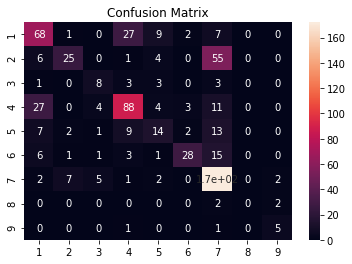

In [166]:
#Displaying confusion matrix-
sns.heatmap(cm,annot=True,xticklabels=[1,2,3,4,5,6,7,8,9],yticklabels=[1,2,3,4,5,6,7,8,9])
plt.title("Confusion Matrix")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


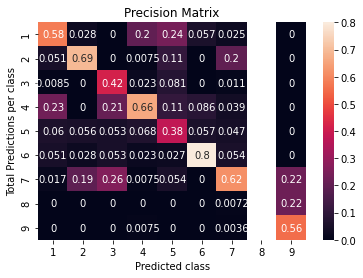

In [167]:
#Displaying Precision Matrix-
Precision=cm/cm.sum(axis=0)
sns.heatmap(Precision,annot=True,xticklabels=[1,2,3,4,5,6,7,8,9],yticklabels=[1,2,3,4,5,6,7,8,9])
plt.title("Precision Matrix")
plt.ylabel("Total Predictions per class")
plt.xlabel("Predicted class")
plt.show()

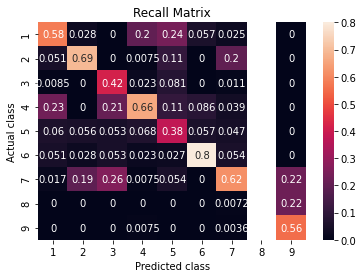

In [168]:
#Displaying Recall Matrix-
Recall=cm/cm.sum(axis=1).reshape(-1,1)
sns.heatmap(Precision,annot=True,xticklabels=[1,2,3,4,5,6,7,8,9],yticklabels=[1,2,3,4,5,6,7,8,9])
plt.title("Recall Matrix")
plt.ylabel("Actual class")
plt.xlabel("Predicted class")
plt.show()

In [50]:
import pickle
file='/content/drive/MyDrive/Test_one_hot_encoded'
with open(file,'wb') as f: 
  pickle.dump(X_Test_one_hot_encoding, f)
f.close()


In [51]:
print(X_Train_one_hot_encoding.shape)
print(X_CV_one_hot_encoding.shape)
print(X_Test_one_hot_encoding.shape)

(2124, 56056)
(532, 56056)
(665, 56056)


##Model 5) Linear SVM -

In [55]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss
C=[0.0001,0.001,0.1,1,5]
for i in C:
  print("For alpha={}-".format(i))
  SGD=SGDClassifier(alpha=i,loss='hinge',class_weight='balanced')
  SGD.fit(X_Train_one_hot_encoding,Y_Train)
  calibrated_prob=CalibratedClassifierCV(SGD,method='sigmoid')
  calibrated_prob.fit(X_Train_one_hot_encoding,Y_Train)
  y_pred_train=calibrated_prob.predict_proba(X_Train_one_hot_encoding)
  print("Train log loss is-",log_loss(Y_Train,y_pred_train))
  y_pred_cv=calibrated_prob.predict_proba(X_CV_one_hot_encoding)
  print("CV log loss is-",log_loss(Y_CV,y_pred_cv))
  y_pred_test_prob=calibrated_prob.predict_proba(X_Test_one_hot_encoding)
  print("Test log loss is-",log_loss(Y_Test,y_pred_test_prob))
  print('*'*50)

For alpha=0.0001-
Train log loss is- 0.6885118298113831
CV log loss is- 1.2009252399099497
Test log loss is- 1.3485160864620183
**************************************************
For alpha=0.001-
Train log loss is- 0.5329041622950793
CV log loss is- 1.1167000362452384
Test log loss is- 1.2639270141368542
**************************************************
For alpha=0.1-
Train log loss is- 1.212185017275625
CV log loss is- 1.3471181350192465
Test log loss is- 1.4859087436500404
**************************************************
For alpha=1-
Train log loss is- 1.628882943700475
CV log loss is- 1.728786141875022
Test log loss is- 1.7427936379266753
**************************************************
For alpha=5-
Train log loss is- 1.648188562557985
CV log loss is- 1.747996347004345
Test log loss is- 1.7545808385461388
**************************************************


##Conclusion-

Best value of alpha is 0.001

In [56]:
#Training with best value of hyperparameter-
i=0.001
print("For Best alpha={}-".format(i))
SGD=SGDClassifier(alpha=i,loss='hinge',class_weight='balanced')
SGD.fit(X_Train_one_hot_encoding,Y_Train)
calibrated_prob=CalibratedClassifierCV(SGD,method='sigmoid')
calibrated_prob.fit(X_Train_one_hot_encoding,Y_Train)
y_pred_train=calibrated_prob.predict_proba(X_Train_one_hot_encoding)
print("Train log loss is-",log_loss(Y_Train,y_pred_train))
y_pred_cv=calibrated_prob.predict_proba(X_CV_one_hot_encoding)
print("CV log loss is-",log_loss(Y_CV,y_pred_cv))
y_pred_test_prob=calibrated_prob.predict_proba(X_Test_one_hot_encoding)
print("Test log loss is-",log_loss(Y_Test,y_pred_test_prob))
print('*'*50)

For Best alpha=0.001-
Train log loss is- 0.5318484593153961
CV log loss is- 1.1187068552888013
Test log loss is- 1.2568555025212944
**************************************************


In [58]:
#Prinitng Confusion matrix-
from sklearn.metrics import confusion_matrix
y_pred=calibrated_prob.predict(X_Test_one_hot_encoding)
cm=confusion_matrix(Y_Test.values,y_pred)

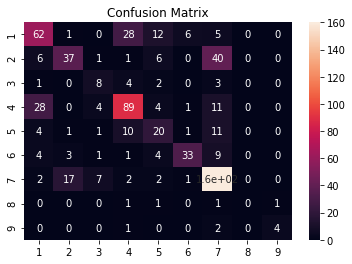

In [59]:
#Displaying confusion matrix-
sns.heatmap(cm,annot=True,xticklabels=[1,2,3,4,5,6,7,8,9],yticklabels=[1,2,3,4,5,6,7,8,9])
plt.title("Confusion Matrix")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


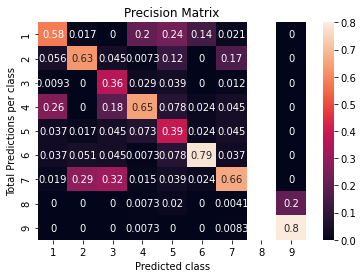

In [60]:
#Displaying Precision Matrix-
Precision=cm/cm.sum(axis=0)
sns.heatmap(Precision,annot=True,xticklabels=[1,2,3,4,5,6,7,8,9],yticklabels=[1,2,3,4,5,6,7,8,9])
plt.title("Precision Matrix")
plt.ylabel("Total Predictions per class")
plt.xlabel("Predicted class")
plt.show()

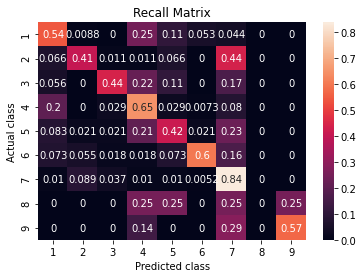

In [64]:
#Displaying Recall Matrix-
Recall=cm/cm.sum(axis=1).reshape(-1,1)
sns.heatmap(Recall,annot=True,xticklabels=[1,2,3,4,5,6,7,8,9],yticklabels=[1,2,3,4,5,6,7,8,9])
plt.title("Recall Matrix")
plt.ylabel("Actual class")
plt.xlabel("Predicted class")
plt.show()

In [ ]:
#Feature importance and interpretability-
y=np.argsort(-abs(SGD.coef_),axis=1)[:,:100]
total_feature_list=[]
for k in range(len(y)):
  gene_dict=[]
  var_dict=[]
  text_dict=[]
  num_gene_present=0
  num_var_present=0
  num_text_present=0
  for l in range(len(y[k])):
    gene_dict.append(total_feat_vocab[y[k][l]])
    var_dict.append(total_feat_vocab[y[k][l]])
    text_dict.append(total_feat_vocab[y[k][l]])
  if X_Test['Gene'].iloc[12].lower() in gene_dict:
    num_gene_present+=1
  if X_Test['Variation'].iloc[12].lower() in var_dict:
    num_var_present+=1
  for m in (X_Test['Text'].iloc[12].split(' ')):
    if m.lower() in text_dict:
      num_text_present+=1
  total_feature_list.append(num_gene_present+num_var_present+num_text_present)

#Stacking classifiers-

In [67]:
pip install mlxtend

In [80]:
from mlxtend.classifier import StackingCVClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier

clf1=MultinomialNB(alpha=1.0)
clf1.fit(X_Train_one_hot_encoding,Y_Train)
calib_clf1=CalibratedClassifierCV(clf1)
calib_clf1.fit(X_Train_one_hot_encoding,Y_Train)
print("Log loss on CV data for NB model is:",log_loss(Y_CV,(calib_clf1.predict_proba(X_CV_one_hot_encoding))))
clf2=SGDClassifier(loss='log',alpha=0.1)
clf2.fit(X_Train_one_hot_encoding,Y_Train)
calib_clf2=CalibratedClassifierCV(clf2)
calib_clf2.fit(X_Train_one_hot_encoding,Y_Train)
print("Log loss on CV data for LR model is:",log_loss(Y_CV,(calib_clf2.predict_proba(X_CV_one_hot_encoding))))
clf3=SGDClassifier(loss='hinge',alpha=0.001)
clf3.fit(X_Train_one_hot_encoding,Y_Train)
calib_clf3=CalibratedClassifierCV(clf3)
calib_clf3.fit(X_Train_one_hot_encoding,Y_Train)
print("Log loss on CV data for SVM model is:",log_loss(Y_CV,(calib_clf3.predict_proba(X_CV_one_hot_encoding))))
alpha = [0.0001,0.001,0.01,0.1,1,10]
for i in alpha:
  lr=SGDClassifier(loss='log',alpha=i)
  sclf = StackingCVClassifier(classifiers=[calib_clf1, calib_clf2, calib_clf3],
                            meta_classifier=lr,use_probas=True
                            )

  sclf.fit(np.array(X)_Train_one_hot_encoding,Y_Train)
  y_pred_train_mc=sclf.predict_proba(X_Train_one_hot_encoding)
  y_pred_cv_mc=sclf.predict_proba(X_CV_one_hot_encoding)
  y_pred_test_mc=sclf.predict_proba(X_Test_one_hot_encoding)
  print("Train log loss is-",log_loss(Y_Train,y_pred_train))
  print("CV log loss is-",log_loss(Y_CV,y_pred_cv))
  print("Test log loss is-",log_loss(Y_Test,y_pred_test_prob))
  print('*'*50)





Log loss on CV data for NB model is: 1.260072596769224
Log loss on CV data for LR model is: 1.3409099164625966
Log loss on CV data for SVM model is: 1.0929048549641547


TypeError: ignored

In [85]:
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingCVClassifier
clf1 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(X_Train_one_hot_encoding, Y_Train)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(X_Train_one_hot_encoding, Y_Train)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = MultinomialNB(alpha=0.001)
clf3.fit(X_Train_one_hot_encoding, Y_Train)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(X_Train_one_hot_encoding, Y_Train)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(Y_CV, sig_clf1.predict_proba(X_CV_one_hot_encoding))))
sig_clf2.fit(X_Train_one_hot_encoding, Y_Train)
print("Support vector machines : Log Loss: %0.2f" % (log_loss(Y_CV, sig_clf2.predict_proba(X_CV_one_hot_encoding))))
sig_clf3.fit(X_Train_one_hot_encoding, Y_Train)
print("Naive Bayes : Log Loss: %0.2f" % (log_loss(Y_CV, sig_clf3.predict_proba(X_CV_one_hot_encoding))))
print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingCVClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(X_Train_one_hot_encoding, Y_Train)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(Y_CV, sclf.predict_proba(X_CV_one_hot_encoding))))
    log_error =log_loss(Y_CV, sclf.predict_proba(X_CV_one_hot_encoding))
    if best_alpha > log_error:
        best_alpha = log_error

Logistic Regression :  Log Loss: 1.05
Support vector machines : Log Loss: 1.73
Naive Bayes : Log Loss: 1.25
--------------------------------------------------


TypeError: ignored

In [71]:
print(sclf)

StackingCVClassifier(classifiers=[MultinomialNB(alpha=1.0, class_prior=None,
                                                fit_prior=True),
                                  CountVectorizer(analyzer='word', binary=False,
                                                  decode_error='strict',
                                                  dtype=<class 'numpy.int64'>,
                                                  encoding='utf-8',
                                                  input='content',
                                                  lowercase=True, max_df=1.0,
                                                  max_features=None, min_df=1,
                                                  ngram_range=(1, 1),
                                                  preprocessor=None,
                                                  stop_words=None,
                                                  strip_accents=None,
                                                  token_p